<a href="https://colab.research.google.com/github/poojamahajan0712/Deploy_ML_model_using_Flask/blob/master/Computer%20Vision%20/Corn_Disease_Detection/CornDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dataset link - https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
import tensorflow as tf
print(tf.__version__)
import pathlib
import PIL
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense,Rescaling

2.17.0


In [3]:
dataset_path = "/content/drive/MyDrive/Corn_disease_dataset/data"
data_dir = pathlib.Path(dataset_path)
tot_count = {}
for folder in data_dir.iterdir():
    image_count = len(list(folder.glob('*.[jJ][pP][gG]')))
    tot_count[folder.name] = image_count

tot_count

{'Gray_Leaf_Spot': 574, 'Blight': 1145, 'Common_Rust': 1306, 'Healthy': 1162}

Lets view all types of diseases and healthy class

(1489, 3264)
(256, 256)
(256, 256)
(256, 256)


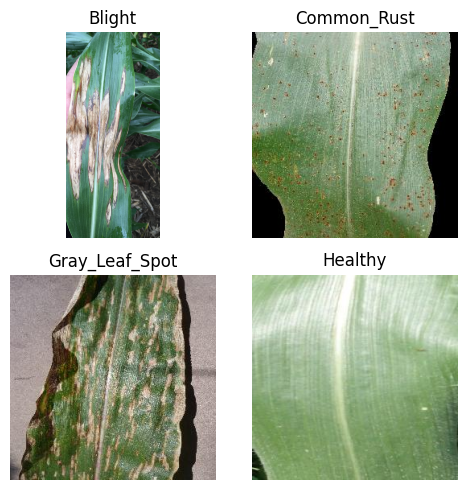

In [4]:
paths_list = {'Blight':"/content/drive/MyDrive/Corn_disease_dataset/data/Blight/Corn_Blight (102).jpg",
              'Common_Rust' :"/content/drive/MyDrive/Corn_disease_dataset/data/Common_Rust/Corn_Common_Rust (1005).JPG",
              'Gray_Leaf_Spot': "/content/drive/MyDrive/Corn_disease_dataset/data/Gray_Leaf_Spot/Corn_Gray_Spot (136).JPG",
              'Healthy' : "/content/drive/MyDrive/Corn_disease_dataset/data/Healthy/Corn_Health (10).jpg"}

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration
# Loop through the dictionary and visualize each image
for ax, (label, image_path) in zip(axes, paths_list.items()):
    image = PIL.Image.open(image_path)
    print(image.size)
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')  # Hide axes for cleaner visualization

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

*  images are of different sizes, need to resize- checked randomly for few images -mostly 256,256 is popular size
* we have jpg,JPG format of data for four folders


In [5]:
## Creating dataset
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#using the validation_split, subset, and seed parameters, image_dataset_from_directory creates two non-overlapping
#datasets for training and validation, ensuring that the model is trained on one set of images and validated on another, distinct set

Found 4187 files belonging to 4 classes.
Using 3350 files for training.
Found 4187 files belonging to 4 classes.
Using 837 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


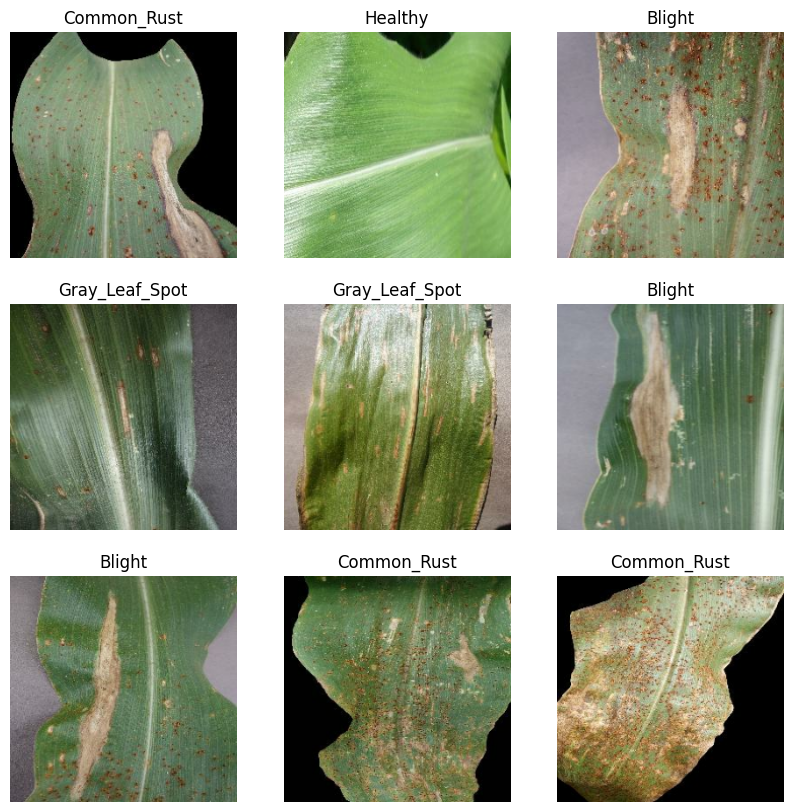

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(image_batch[0,:,:,0])
  print(labels_batch.shape)
  print(labels_batch[0])
  break

(32, 224, 224, 3)
tf.Tensor(
[[153.64796  150.5153   149.05103  ... 103.05109  108.28574  111.00004 ]
 [151.03061  149.44899  149.79082  ...  91.01024   95.26023   97.72962 ]
 [148.       148.29082  150.42857  ...  85.770424  88.43369   89.59695 ]
 ...
 [167.49995  168.6428   169.78568  ... 146.2705   146.00003  142.18875 ]
 [167.58675  168.       169.14287  ... 141.0612   140.35707  137.67339 ]
 [172.64294  172.65825  173.0715   ... 146.18378  145.45932  145.29608 ]], shape=(224, 224), dtype=float32)
(32,)
tf.Tensor(2, shape=(), dtype=int32)


In [33]:
num_classes = 4
model = tf.keras.Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                             Conv2D(128,3,activation='relu'),
                             MaxPooling2D(),
                             Conv2D(128,3,activation='relu'),
                             MaxPooling2D(),
                             Conv2D(64,3,activation='relu'),
                             Conv2D(64,3,activation='relu'),
                             MaxPooling2D(),
                             Conv2D(32,3,activation='relu'),
                             Conv2D(32,3, activation='relu'),
                             MaxPooling2D(),
                             Flatten(),
                             Dropout(0.3),
                             Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0001))])



model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 23, 23, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 709,796 (2.71 MB)

 Trainable params: 709,796 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
# !rm -rf /content/drive/MyDrive/corn_detection/checkpoints/

In [14]:


# # Define a checkpoint callback
checkpoint_filepath = '/content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_{epoch:02d}.weights.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_best_only=False,
    monitor='loss',
    verbose=1
)

epoch_to_load = 10
checkpoint_base_filepath = '/content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_'
checkpoint_filepath_to_check = f'{checkpoint_base_filepath}{epoch_to_load:02d}.weights.h5'

# Check if the checkpoint file exists before loading
if os.path.exists(checkpoint_filepath_to_check):
    model.load_weights(checkpoint_filepath_to_check)
    print(f"Checkpoint loaded from {checkpoint_filepath_to_check}. Resuming training from epoch {epoch_to_load}...")
else:
    print(f"No checkpoint found at {checkpoint_filepath_to_check}. Starting training from scratch.")


# Train the model
history =  model.fit(
    train_ds ,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=val_ds,
    callbacks=[checkpoint_callback]
)


No checkpoint found at /content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_10.weights.h5. Starting training from scratch.
Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.7653 - loss: 0.6384
Epoch 1: saving model to /content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_01.weights.h5
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 332ms/step - accuracy: 0.7658 - loss: 0.6369 - val_accuracy: 0.8650 - val_loss: 0.3431
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8718 - loss: 0.3578
Epoch 2: saving model to /content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_02.weights.h5
105/105 ━━━━━━━━━━━━━━━━━━━━ 55s 189ms/step - accuracy: 0.8718 - loss: 0.3576 - val_accuracy: 0.8722 - val_loss: 0.3550
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9050 - loss: 0.2881
Epoch 3: saving model to /content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_03.weights.h5
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/st

* Load model from checkpoint

In [13]:
# load from checkpoint
checkpoint_path = "/content/drive/MyDrive/corn_detection/checkpoints/checkpoint.epoch_10.weights.h5"

# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(val_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 - 114s - 4s/step - accuracy: 0.8841 - loss: 0.4704
Restored model, accuracy: 88.41%


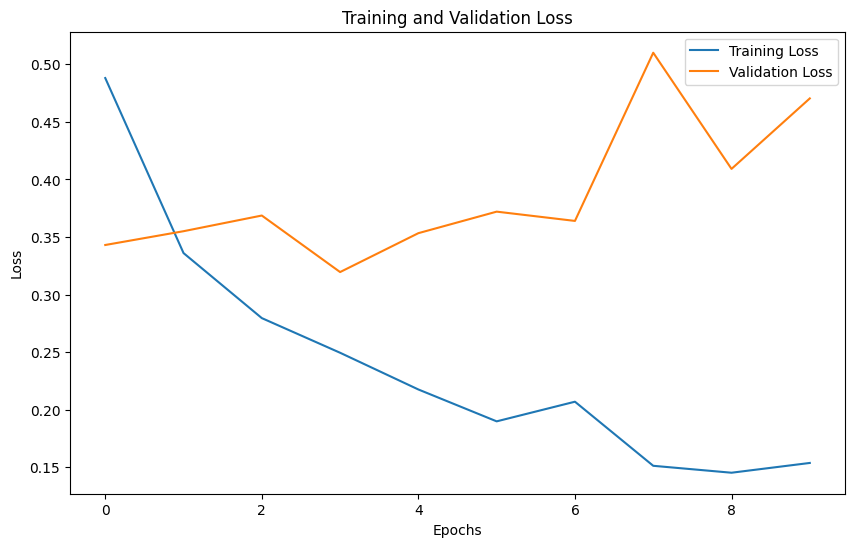

In [15]:
# Extract loss and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


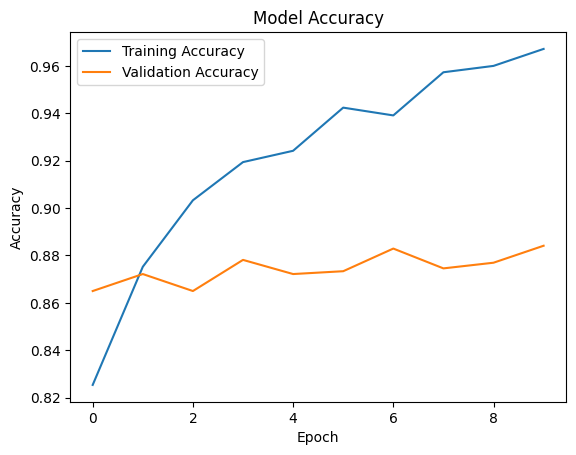

In [16]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [30]:

# predict on new image
img_path = "/content/drive/MyDrive/Corn_disease_dataset/data/Gray_Leaf_Spot/Corn_Gray_Spot (104).JPG"

img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
This image most likely belongs to Gray_Leaf_Spot with a 42.63 percent confidence.


In [31]:
predictions

array([[1.4469635e-01, 2.1712035e-03, 8.5312724e-01, 5.1528859e-06]],
      dtype=float32)

In [32]:
score

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.20994037, 0.1820531 , 0.42634737, 0.18165919], dtype=float32)>

#### convert to tensorflowlite model

In [19]:
## convert to tensorflowlite model
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
model_path = '/content/drive/MyDrive/corn_detection/tensorflow_models/model.tflite'
with open(model_path, 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpikw43ooy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  135014851718032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014851722608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014849781552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014849785952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014850200848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014850203840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014850205600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014850207888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014851722784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135014851721200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13501485021070

In [26]:
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.get_signature_list()

{'serving_default': {'inputs': ['keras_tensor'], 'outputs': ['output_0']}}

In [27]:
classify_lite = interpreter.get_signature_runner('serving_default')
predictions_lite = classify_lite(keras_tensor=img_array)['output_0']
score_lite = tf.nn.softmax(predictions_lite)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Gray_Leaf_Spot with a 42.63 percent confidence.
